In [61]:
%load_ext autoreload
%autoreload
%matplotlib widget
import importlib
from SOAEpeaks import load_df
import phaseco as pc
from phaseco import *
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian
importlib.reload(pc)
import ipywidgets as widgets
from IPython.display import display
from scipy.signal.windows import kaiser


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = load_df(laptop=True, dfs_to_load=["Curated Data"])
wf = df[df['species'] == 'Anolis'].iloc[0]['wf']
wf_title = df[df['species'] == 'Anolis'].iloc[0]['filepath'].split('\\')[-1]
fs = 44100
del df


Loading Curated Data
Combining into one Dataframe!


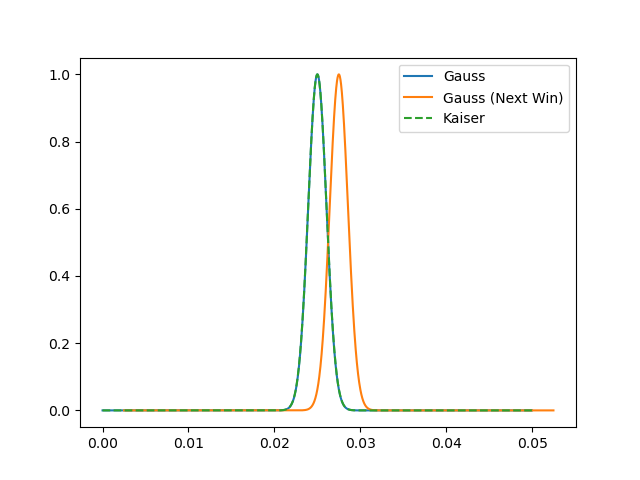

In [ ]:
"Visualize Kaiser Window"
xi = 0.0025
tau = 0.05
nperseg = tau * fs
t = np.arange(0, tau, 1/fs)

# Get sigma as a function of desired fwhm, in this case xi
def get_sigma(fwhm):
    return fwhm / (2 * np.sqrt(2 * np.log(2)))
sigmaS = get_sigma(xi) * fs
beta = 550 # Estimated by eye to match the sigma

kaiser_window = get_window(('kaiser', beta), nperseg)
gauss_window = get_window(('gauss', sigmaS), nperseg)

plt.close('all')
plt.plot(t, gauss_window, label="Gauss")
plt.plot(t + xi, gauss_window, label="Gauss (Next Win)")
plt.plot(t, kaiser_window, ls = '--', label="Kaiser")
plt.plot(t + xi, kaiser_window, ls = '--', label="Kaiser")
plt.legend()
plt.show()



In [70]:
fs = 44100
xi = 0.0025
tau = 0.05
sigma = get_sigma(fwhm=xi)
beta = 550
# f, psd = pc.get_welch(wf=wf, fs=fs, tau=tau)
# f, C_tau = pc.get_coherence(wf=wf, fs=fs, tau=tau, xi=xi, ref_type="next_seg")
# f, C_tau_sigma = pc.get_coherence(wf=wf, fs=fs, tau=tau, xi=xi, ref_type="next_seg", sigma=sigma)
f, C_tau_beta = pc.get_coherence(wf=wf, fs=fs, tau=tau, xi=xi, ref_type="next_seg", win_type=('kaiser', beta))

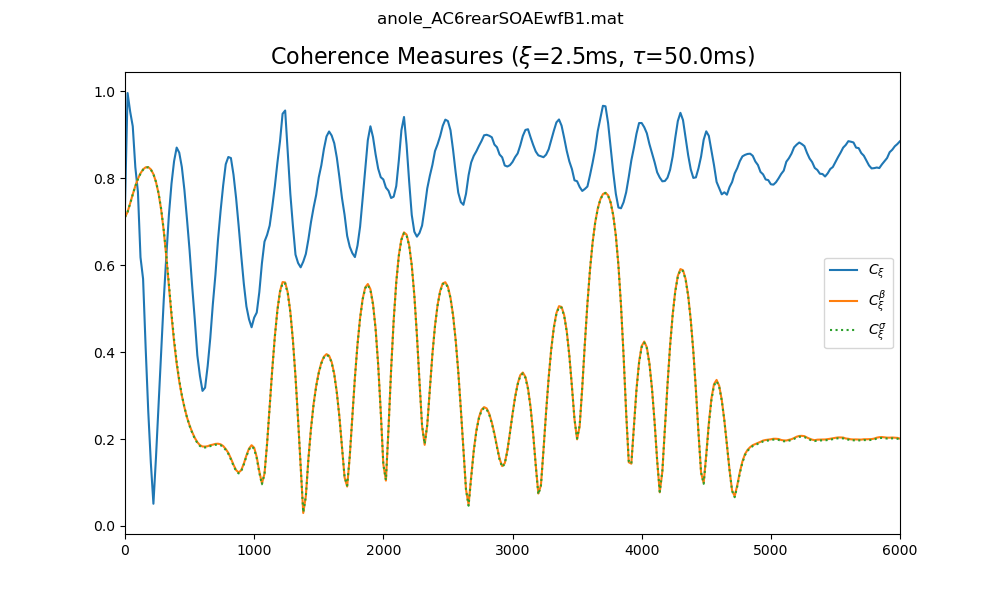

In [71]:
plt.close('all')
plt.figure(figsize=(10, 6))
plt.suptitle(wf_title, fontsize=12)
plt.title(r"Coherence Measures ($\xi$=" + f"{xi*1000}ms, " + r"$\tau$=" + f"{tau*1000}ms)", fontsize=16)
plt.plot(f, C_tau, label=r"$C_{\xi}$")
plt.plot(f, C_tau_beta, label=r"$C_{\xi}^{\beta}$")
plt.plot(f, C_tau_sigma, ls=':',label=r"$C_{\xi}^{\sigma}$")
plt.xlim(0, 6000)

plt.legend()
plt.show()

In [ ]:
# Note Gaussian takes sigma "in samples" while Kaiser takes beta "in time":

fs = 44100
t_max = 1
N = fs * t_max
kaiser1 = kaiser(N, beta=10, sym=False)
gauss1 = gaussian(N, std=1000, sym=False)
t = np.arange(0, t_max, 1/fs)

fs = 44100 * 5
t_max = 1
N = fs * t_max
kaiser2 = kaiser(N, beta=10, sym=False)
gauss2 = gaussian(N, std=1000, sym=False)
t2 = np.arange(0, t_max, 1/fs)
plt.close('all')
plt.plot(t, kaiser1 + 0.01, label="kaiser")
plt.plot(t2, kaiser2, label="kaiser2")
plt.plot(t, gauss1 + 0.01, label="gauss")
plt.plot(t2, gauss2, label="gauss2")
plt.legend()
plt.show()